In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
from sklearn import ensemble, model_selection, metrics, datasets, tree

import pandas as pd
import numpy as np

In [20]:
digits = datasets.load_digits()

In [21]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [22]:
X = pd.DataFrame(digits.data)
y = pd.DataFrame(digits.target)

In [23]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [30]:
def write_answer(mean, num):
    with open('answer' + str(num) + '.txt', 'w') as f:
        f.write(str(mean))

In [50]:
clf = tree.DecisionTreeClassifier(random_state = 1)
score_decis = model_selection.cross_val_score(clf, X, y, cv = 10)
print(score_decis)
print(score_decis.mean())
write_answer(score_decis.mean(), 1)

[0.8        0.84153005 0.82320442 0.80555556 0.7877095  0.89944134
 0.90502793 0.82022472 0.83615819 0.78977273]
0.8308624439503834


In [52]:
clf_bagging = ensemble.BaggingClassifier(n_estimators = 100)
score_bagging = model_selection.cross_val_score(clf_bagging, X, y, cv = 10)
print(score_bagging.mean())
write_answer(score_bagging.mean(), 2)

C:\Users\roy_d\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roy_d\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roy_d\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roy_d\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.9283105698653035


In [55]:
d = X.shape[1]
bag_sqrt = ensemble.BaggingClassifier(n_estimators = 100, max_features = (1/d)**0.5)
score_bag_sqrt = model_selection.cross_val_score(bag_sqrt, X, y, cv = 10)
print(score_bag_sqrt.mean())
write_answer(score_bag_sqrt.mean(), 3)

C:\Users\roy_d\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roy_d\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roy_d\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roy_d\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.9298802020673941


In [58]:
from sklearn.tree import DecisionTreeClassifier
clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_features = (1/d)**0.5), n_estimators = 100)
score_dec_bag = model_selection.cross_val_score(clf, X, y, cv = 10)
print(score_dec_bag.mean())
write_answer(score_dec_bag.mean(), 4)

C:\Users\roy_d\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roy_d\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roy_d\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roy_d\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.9544251365187802


In [62]:
clf = ensemble.RandomForestClassifier(n_estimators = 100, max_features = (1/d)**0.5)
score_RFC = model_selection.cross_val_score(clf, X, y, cv = 10)
print(score_RFC.mean())

0.9500061929982744


In [65]:
number_of_estimator = np.arange(5, 150, 5)
score_RFC = []
for i in number_of_estimator:
    clf = ensemble.RandomForestClassifier(n_estimators = i, max_features = (1/d)**0.5)
    score_RFC.append(model_selection.cross_val_score(clf, X, y, cv = 10).mean())

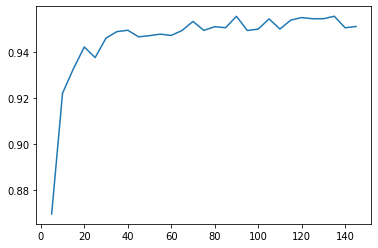

In [66]:
import matplotlib.pyplot as plt
plt.plot(number_of_estimator, score_RFC)
plt.show()

In [69]:
answer5 = [2, 3, 4, 7]
with open('answer5.txt', 'w') as f:
    f.write(' '.join([str(num) for num in answer5]))